# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

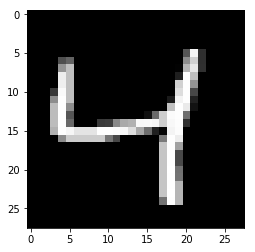

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6827
Epoch: 1/20... Training loss: 0.6788
Epoch: 1/20... Training loss: 0.6726
Epoch: 1/20... Training loss: 0.6663
Epoch: 1/20... Training loss: 0.6593
Epoch: 1/20... Training loss: 0.6507
Epoch: 1/20... Training loss: 0.6400
Epoch: 1/20... Training loss: 0.6299
Epoch: 1/20... Training loss: 0.6165
Epoch: 1/20... Training loss: 0.6019
Epoch: 1/20... Training loss: 0.5862
Epoch: 1/20... Training loss: 0.5707
Epoch: 1/20... Training loss: 0.5532
Epoch: 1/20... Training loss: 0.5366
Epoch: 1/20... Training loss: 0.5179
Epoch: 1/20... Training loss: 0.4962
Epoch: 1/20... Training loss: 0.4817
Epoch: 1/20... Training loss: 0.4635
Epoch: 1/20... Training loss: 0.4444
Epoch: 1/20... Training loss: 0.4303
Epoch: 1/20... Training loss: 0.4136
Epoch: 1/20... Training loss: 0.4072
Epoch: 1/20... Training loss: 0.3909
Epoch: 1/20... Training loss: 0.3775
E

Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1918
E

Epoch: 2/20... Training loss: 0.1672
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1569
E

Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1378
E

Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1303
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1312
E

Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1134
E

Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1061
E

Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1111
E

Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1069
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0991
E

Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0923
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0999
E

Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1037
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0877
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0878
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0880
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0865
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

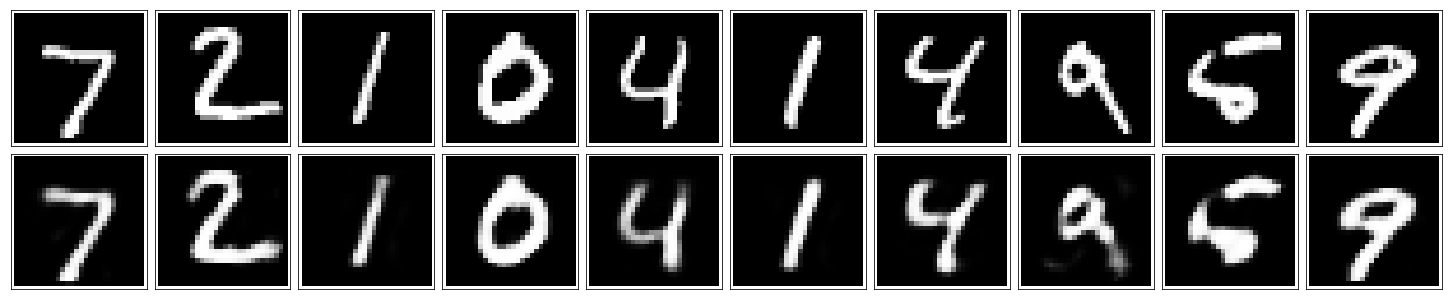

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.